In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Load dataset
dataset = pd.read_csv('Mall_Customers.csv')
# Display dataset
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
# Select features
X = dataset.iloc[:, 3:5].values
# Mean Shift Clustering
from sklearn.cluster import MeanShift
clustering = MeanShift()
y_clustering = clustering.fit_predict(X)
# Get cluster labels
y_clustering

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [3]:
# Add cluster labels to dataset
supervised = dataset
supervised['Cluster_group'] = y_clustering
# Display dataset with clusters
supervised
# Save to CSV
supervised.to_csv("cluster_meanshift.csv", index=False)
# Get attributes
dir(clustering)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_params_html',
 '_html_repr',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_params',
 'bandwidth',
 'bin_seeding',
 'cluster_all',
 'cluster_centers_',
 'fit',
 'fit_predict',
 'get_metadata_routing',
 'get_params',
 'labels_',
 'max_iter',
 'min_bin_fr

In [4]:
# Get cluster centers
centroids = clustering.cluster_centers_
# Display centroids
centroids
# Display cluster labels
y_clustering
# Get column names
supervised.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster_group'],
      dtype='object')

/Users/harikrishnan/Documents/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


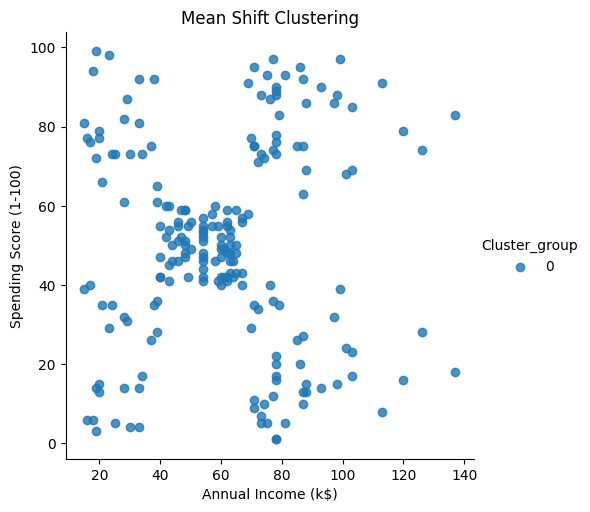


Number of clusters found: 1


In [5]:
# Visualize clusters using seaborn
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], 
                   hue=supervised.columns[5], fit_reg=False, legend=True, legend_out=True)

plt.title('Mean Shift Clustering')
plt.show()
# Print number of clusters found
n_clusters = len(clustering.cluster_centers_)
print(f"\nNumber of clusters found: {n_clusters}")